## ANN Implementation

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)


In [ ]:
print(X_train.ndim)

3


In [ ]:
print(type(y_train))
y_train.shape

<class 'numpy.ndarray'>


(60000,)

In [ ]:
y_test[6].shape

()

In [ ]:
X_train_flat = X_train.reshape(len(X_train),28*28)

In [ ]:

model=keras.Sequential([keras.layers.Dense(100,input_shape=(28*28,),activation="tanh"),
                        keras.layers.Dense(50, activation='relu'),
                        keras.layers.Dense(10, activation='sigmoid')
                        ])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

In [ ]:
model.fit(X_train_flat,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 19s 8ms/step - loss: 0.6316 - accuracy: 0.7978
Epoch 2/6
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4474 - accuracy: 0.8578
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8755
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3526 - accuracy: 0.8884
Epoch 5/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3271 - accuracy: 0.8963
Epoch 6/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3188 - accuracy: 0.8990


In [ ]:
model2=keras.Sequential([keras.layers.Flatten(),
                         keras.layers.Dense(100,input_shape=(28*28,),activation="sigmoid"),
                         keras.layers.Dense(50, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')
                        ])

model2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

In [ ]:
model2.fit(X_train,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5486 - accuracy: 0.8371
Epoch 2/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3875 - accuracy: 0.8804
Epoch 3/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3490 - accuracy: 0.8920
Epoch 4/6
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3354 - accuracy: 0.8957
Epoch 5/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2979 - accuracy: 0.9077
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2885 - accuracy: 0.9100


In [ ]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2718 - accuracy: 0.9139


[0.27177825570106506, 0.9139000177383423]

In [ ]:
y_test_pre=model2.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
model2.get_weights()

[array([[ 0.02740103, -0.07930531, -0.00775049, ..., -0.02940127,
          0.07575162, -0.06881242],
        [ 0.0668809 ,  0.08102022,  0.02550234, ...,  0.05087985,
         -0.01059554, -0.01846958],
        [ 0.02807036, -0.01146443,  0.00913544, ...,  0.05467334,
         -0.00016256, -0.01264273],
        ...,
        [ 0.00182319, -0.07843942, -0.03668324, ..., -0.02045324,
         -0.05921328,  0.065355  ],
        [ 0.00422484,  0.05222702, -0.06851525, ..., -0.07149133,
          0.00261231,  0.0026207 ],
        [ 0.02855059, -0.0373503 ,  0.04403475, ...,  0.01921965,
          0.02513242, -0.00960977]], dtype=float32),
 array([-0.04203546,  0.08227468, -0.11162871, -0.01611434,  0.01182549,
        -0.04063673, -0.03591505, -0.00623141,  0.017307  ,  0.10107815,
        -0.02389448, -0.03975864,  0.07319206, -0.10611954, -0.02539202,
        -0.03123179, -0.07238772, -0.04500705, -0.06645609,  0.01346801,
         0.10791196,  0.06625986,  0.01004459, -0.05444222,  0.056

In [ ]:
y_test_pre.shape

(10000, 10)

In [ ]:
np.argmax(y_test_pre)

45307

In [ ]:
y_test_label=[np.argmax(i) for i in y_test_pre]
y_test_label=np.array(y_test_label)

In [ ]:
y_test_label.shape

(10000,)

In [ ]:
y_test[5],y_test_pre[5],np.argmax(y_test_pre[5]) ,y_test_label[5]

(1,
 array([6.5770159e-08, 9.9008763e-01, 2.4022422e-05, 3.2705077e-04,
        1.3006774e-04, 2.0057159e-06, 7.6032251e-07, 9.1958698e-03,
        6.8555601e-05, 1.6386861e-04], dtype=float32),
 1,
 1)

In [ ]:
cm=tf.math.confusion_matrix(y_test,y_test_label)
type(cm)

tensorflow.python.framework.ops.EagerTensor

<Axes: >

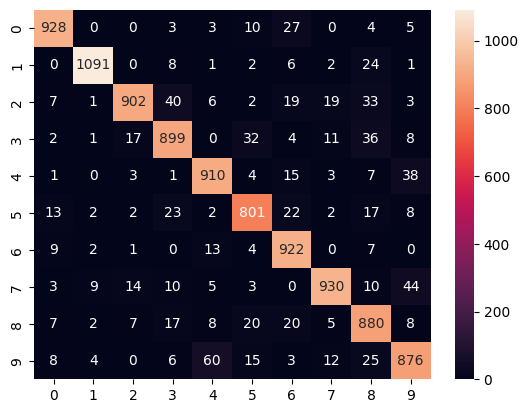

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

## Activation Functions Implementations (manual)

In [ ]:
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [ ]:
sigmoid(-99)

1.0112214926104486e-43

In [ ]:
def relu(x):
  if x<0:
    return 0

  else:
      return 1

In [ ]:
relu(-2)

0

In [ ]:
def tanh(x):
  return (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))

In [ ]:
tanh(5)

0.999909204262595

In [ ]:
def leak_relu(x):
  if x<0 :
    return 0.01*x
  else:
    return x

In [ ]:
leak_relu(-5)

-0.05

In [ ]:
def elu(x):
  if x<0:
    return math.exp(x)
  else:
    return x

In [ ]:
elu(-5)

0.006737946999085467

In [ ]:
gama = 1.0507
alpha = 1.6732

def SELU(x):
    if x > 0:
        return gama*alpha
    return gama*alpha*(math.exp(x) - 1)

In [ ]:
SELU(-9)

-1.7578142817090934

In Softmax Function the sum of probabilities of neurons in output layer will be 1 and we always use softmax in multiclass classsification

In [ ]:
model_s=keras.Sequential([keras.layers.Flatten(),
                         keras.layers.Dense(100,input_shape=(28*28,),activation="softmax"),
                         keras.layers.Dense(50, activation='softmax'),
                         keras.layers.Dense(10, activation='softmax')
                        ])

model_s.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

In [ ]:
y_test_pre=model_s.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
np.sum(y_test_pre[5])

0.9999999

In [ ]:
y=np.array([1,0,1,1,0,1])
yhat=np.array([1,0,0.4,0,1,0.8])

#Loss Functions Implementation

In [ ]:
def mae(yt,yp):
  total_error=0
  for i,j in zip(yt,yp):
    total_error = total_error + abs(i-j)

  mae = total_error/len(yt)

  print("total error : ",total_error)
  print("MAE : ", mae)

In [ ]:
mae(y,yhat)

total error :  2.8
MAE :  0.4666666666666666


In [ ]:
(y-yhat)

array([ 0. ,  0. ,  0.6,  1. , -1. ,  0.2])

In [ ]:
np.mean(np.abs(y-yhat))

0.4666666666666666

In [ ]:
def mse(yt,yp):
  total_error=0
  for i,j in zip(yt,yp):
    total_error = total_error + (i-j)**2

  mse = total_error/len(yt)

  print("total error : ",total_error)
  print("MSE : ", mse)

In [ ]:
mse(y,yhat)

total error :  2.4
MSE :  0.39999999999999997


In [ ]:
np.mean((y-yhat)**2)

0.39999999999999997

## Log Loss Entropy

In [ ]:
def log_loss(yt,yp):
  return -np.nanmean(yt*np.log(yp)+(1-yt)*np.log(1-yp))

In [ ]:
log_loss(y,yhat)

<ipython-input-46-2fbfe8de8646>:2: RuntimeWarning: divide by zero encountered in log
  return -np.nanmean(yt*np.log(yp)+(1-yt)*np.log(1-yp))
<ipython-input-46-2fbfe8de8646>:2: RuntimeWarning: invalid value encountered in multiply
  return -np.nanmean(yt*np.log(yp)+(1-yt)*np.log(1-yp))


inf

This is because the value of log(0) is undefined.
to fix this :-

In [ ]:
def log_loss(yt,yp):
  e=1e-10
  yp_new=[max(i,e) for i in yp]
  yp_new=np.array([min(i,1-e) for i in yp_new])
  return -np.nanmean(yt*np.log(yp_new)+(1-yt)*np.log(1-yp_new))

In [ ]:
log_loss(y,yhat)

7.865189343421485

In [ ]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot((age),np.transpose(y_predicted-y_true))
        w2d = (1/n)*np.dot((affordability),(y_predicted-y_true))
        #print("weighted_sum",weighted_sum, "y_predicted",y_predicted,"loss",loss,"w1d",w1d,"w2d",w2d)
        bias_d = np.mean(y_predicted-y_true)

        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

# gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)